# Data Cleaning

This notebook will walk through our process of cleaning the data sets and combining them.

In [1]:
# loading necessary libararies
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [2]:
# load datasets
dvd_original = pd.read_csv("data/DVD_Original.csv")
va_original = pd.read_csv("data/VA_Original.csv")

View of the two datasets:

In [3]:
dvd_original.head(3)

,Unnamed: 0,Act_t1_avg,Act_t2_avg,Act_t2_avg_mc,Act_t3_avg,Act_t3_tot,Actpt1_t1,Actpt1_t2,Actpt1_t3,Actpt2_t1,...,ZSE4_sex_Ableorgasm,ZSE4_sex_Erectfreq,ZSE4_sex_Erectqual,ZSE4_sex_function,ZSE4_sex_ProbOverall,Choice3Comb,Choice2_Check,Choice3_Check,Choice3_lean_Check,Transcripts_Included
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2,3.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [4]:
va_original.head(3)

,Unnamed: 0,ID,MD,Ch_IL,RadOnc_apt,ActiveSurveillance,Surgery,Radiation,Brachy,Recom,...,MD_hispanic,MD_black,MD_native,MD_asian,MD_pacific,MD_raceother,MD_raceotherspecify,filter_$,As_1,Ch3_AS
0,0,A003,AMD010,2.0,0,-2,0,0,NaN,-1,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0
1,1,A004,AMD012,2.0,1,-1,0,0,NaN,-1,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0
2,2,A014,AMD010,1.0,1,1,0,-2,NaN,1,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,0.0


## Simple Variable Name Change

The variables under this section are shared between the two datasets and only need a variable name change to match because the responses to these variables are coded the same.

In [5]:
"""
    Maps variable names of one dataset to the other
    
    input: dataset
    output: dataset with new matching variable names
"""

def map_var_names(df, var_map):
    df_copy = df.copy()
    df_changed_names = df_copy.rename(index=str, columns=var_map)
    return df_changed_names

# NOTE: we make a copy of df to preserve the integrity of the original dataset

### Demographics

This section matches up the patient demographic variables between the two datasets.

In [6]:
# maps DVD demo. var names to var names in VA
demo_map = {
    'demo_ID': 'ID', 'demo_age': 'age', 'demo_education': 'education', 'demo_race_arabme': 'arabme',
    'demo_race_hispanic': 'hispanic', 'demo_race_white': 'white', 'demo_race_black': 'black',
    'demo_race_native': 'native', 'demo_race_asian': 'asian', 'demo_race_pacific': 'pacific',
    'demo_race_other': 'raceother', 'demo_marry': 'marry'
}

### Physician Interaction

This section matches up the physician interaction variables between the two datasets. For example, the answer to the question, "My physician asked for my opinion about what type of treatment would be best for me" (Urosat10 / Opinion3).

In [7]:
# maps DVD phys.interaction var names to var names in VA
phys_map = {
    'Urosat10': 'Opinion3', 'Urosat2_rev': 'Ask3', 'Urofeel3_t3': 'Info3',
    'Urofeel3_t3': 'Explain3', 'UroApt_partdec': 'Involve3', 'Urosat1': 'Satis3',
    'Dec3_best': 'Clear3', 'Urosat7': 'mdrespme', 'Urofeel6_t3': 'irespmd'
}

### Knowledge Questions

Patients were administered comprehension questions to ensure they had studied the background knowledge of prostate cancer, so they could make informed decisions when choosing treatment. This section matches up the patients' answers to these comprehension questions.

In [8]:
# maps DVD knowledge var names to var names in VA
know_map = {
    'Know2_Dienot2': 'Dienot2', 'Know2_Wait2': 'Wait2', 'Know2_Sured2': 'Sured2',
    'Know2_Raded2': 'Raded2', 'Know2_Wwed2': 'Wwed2', 'Know2_Surpee2': 'Surpee2',
    'Know2_Radpee2': 'Radpee2', 'Know2_Wwpee2': 'Wwpee2'
}

### Anxiety Questions

Patients were asked questions concerning how anxious thinking about cancer made them. This section matches up the variable names for the answers to these questions.

In [9]:
# maps DVD anxiety var names to var names in VA
anx_map = {
    'Anx11': 'Anx11', 'Anx12': 'Anx51', 'Anx13': 'Anx61',
    'Anx14': 'Anx71', 'Anx15': 'Anx91', 'Anx16': 'Anx111',
    'Anx21': 'Anx12', 'Anx22': 'Anx52', 'Anx23': 'Anx62',
    'Anx24': 'Anx72', 'Anx25': 'Anx92', 'Anx26': 'Anx112',
    'Anx31': 'Anx13', 'Anx32': 'Anx53', 'Anx33': 'Anx63',
    'Anx34': 'Anx73', 'Anx35': 'Anx93', 'Anx36': 'Anx113'
}

### MD Demographics

This section matches up demographic variables on doctors that are present in both datasets.

In [10]:
# maps misc. DVD var names to var names in VA
md_demo_map = {
    'MD1_type': 'MD_type', 'MD1_age': 'MD_gender'
    'MD1_gender': 'MD_gender', 'MD1_race': 'MD_race'
    'MD1_graduate': 'MD_yrgrad', 'MD1_spec': 'MD_specialty'
    'MD1_weeklyPT': 'MD_number_pts_wk', 'MD1_percentcare':'MD_percentpts'
}

### Miscellaneous

This section matches up miscellaneous variables that are present in both datasets.

In [10]:
# maps misc. DVD var names to var names in VA
misc_map = {
    'DA2_DA_use_dichot': 'Timeda2', 
    'Cancer_Gleason': 'gleason', 'Cancer_psa': 'psa1'
}

## Processed Variables

The variables under this section need more processing to match. Either they are coded differently, or we want to represent the data differently. As a result, the code for this processing is specific to the variable.

### Pre-Diagnosis Decision

This section deals with the variables concerning the patients' preferences for cancer treatment prior to diagnosis. In the DVD dataset, this is coded as a single variable with six different classes. In the VA dataset, each treatment is coded as its own variable with a binary classification. We will match DVD to VA by separating each treatment option into a binary variable.

Additional Note: The VA dataset has more explicitly stated treatment options, while the DVD dataset groups some of these treatments into the "other" category. For cohesion, we take the treatments in VA that are not explicitly stated in DVD and combine them with VA's "other" category.

In [11]:
# helper funtion for conversion
def check_matching(value, target):
    if(value == target):
        return 1
    elif np.isnan(value):
        return np.nan
    return 0

In [12]:
"""
    Creates dataframe where the extra VA variables are stored in "TXother2" col
    
    input: VA dataset
    output: VA dataset with variable that groups "other" variables
"""

def va_other_grouping(df):
    df_copy = df.copy()
    
    temp = []
    for i in range(len(df.index)):
        if df_copy['Txd2'][i]==1 or df_copy['Txf2'][i]==1 or df_copy['Txg2'][i]==1:
            temp.append(1)
        elif np.isnan(df_copy['Txd2'][i]) and np.isnan(df_copy['Txf2'][i]) and np.isnan(df_copy['Txg2'][i]):
            temp.append(np.nan)
        else:
            temp.append(0)
    
    df_copy['Txother2'] = np.asarray(temp)
    return df_copy
    

We might also want to combine the "Not sure" and "Other" classes of DVD's variable. However, doing this may change DVD's meaning of "Other". Our rationale for doing this is that a "Not Sure" option was not included in VA, so "Not Sure" may already be contained within "Other" for VA.

In [13]:
""""
    Combines "Not Sure" and "Other" options of DVD - only returns column
    
    input: DVD dataset
    output: Series representing TxChoice2_orig if "Not Sure" and "Other" 
            options were combined
"""

def dvd_other_grouping(df):
    df_copy = df.copy()
    
    treat_col = df['TxChoice2_orig'].map(lambda x: 5 if (x == 5 or x == 6) 
                                         else x) 
    
    return treat_col

In [14]:
""""
    Creates binary variables from DVD's TxChoice2_orig variables
    
    input: DVD dataset, TxChoice2_orig after running dvd_other_grouping
    output: DVD dataset with TxChoice2_orig split into binary variables
"""

def pre_decision(df, txorig):
    df_copy = df.copy()
    
    # matches VA variable with DVD treatment #
    pre_dec_map = {
        'Txa2': 2, 'Txb2': 3, 'Txc2': 4, 'Txe2': 1, 'Txother2': 5
    }
    
    for key, value in pre_dec_map.items():
        df_copy[key] = list(map(lambda x: (check_matching(x, value)), 
                               txorig))
        
    return df_copy    

Key for shared Tx columns: <br />
* Txa2: surgery <br />
* Txb2: external beam radiation <br />
* Txc2: brachytherapy <br />
* Txe2: active surveillance <br />
* Txother2: other


### Final Decision

This section deals with the patients' treatment preference after consulting their physician. Both the VA and DVD datasets have fields for chosen treatment and the treatment the patient is leaning towards (if patient is unsure of choice). We will combine these two fields into a "treatment preference" variable.

In addition, because the main goal of this analysis is to determine the conditions under which active surveillance is chosen, we will create a binary variable for active surveillance. This may help with analysis and eventual predictive machine learning models.

In [15]:
import math

In [16]:
""""
    Combines treatment columns into one preferred treatment column
    
    input: dataframe, which dataset ("va" or "dvd")
    output: dataframe with treatment choice and treatment lean combined
"""

def combined_treatment(df, dataset):
    df_copy = df.copy()
    
    # tuple for variable names depending on which dataset
    tx = ('TxChoice3_decided', 'TxChoice3_lean') if dataset=='dvd' else ('Tx3', 'Txlean3')
    
    # combines columns
    pref_treatment = []
    for i in range(len(df.index)):
        pref_treatment.append(df[tx[0]][i] if np.isnan(df[tx[1]][i]) 
                                                         else df[tx[1]][i])
    
    df_copy['pref_treatment'] = np.asarray(pref_treatment)
    return df_copy

Quick evidence that the two columns were combined correctly by showing that null values in both fields carry over to the combined field:

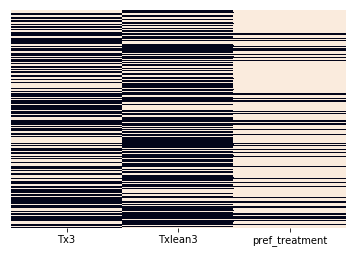

In [17]:
sns.heatmap(combined_treatment(va_original, 'va')[['Tx3', 'Txlean3', 'pref_treatment']].notna(), yticklabels=False,cbar=False)

Because the variables for treatment decision are coded differently, they have to be converted to match. The method of this conversion will be similar to the conversion used in the "Pre-Diagnosis Decision" section.

Shared Coding:  <br />
1. active surveillance
2. surgery
3. external beam radiation
4. brachytherapy
5. other

In [18]:
# map for converting each dataset to shared coding above
va_pref_mapping = {
    5:1, 1:2, 2:3, 3:4, 4:5, 6:5, 7:5
}

dvd_pref_mapping = {
    1:1, 2:2, 3:3, 4:4, 5:5, 6:5
}

In [19]:
# helper function for shared coding of treatments
def coding_helper(x, mapping):
    if x in mapping:
        return mapping[x]
    else:
        return np.nan

In [20]:
""""
    Maps treatment variable to shared coding
    
    input: dataframe (result of combined_treatment), which dataset ("va" or "dvd")
    output: dataframe with pref_treatment as shared coding
"""

def code_treatment(df, dataset):
    # chooses dictionary based on dataset
    if dataset == 'va':
        mapping = va_pref_mapping
    else:
        mapping = dvd_pref_mapping
    
    df_copy = df.copy()
    df_copy['pref_treatment'] = list(map((lambda x: coding_helper(x, mapping)), 
                                         df_copy['pref_treatment']))
    
    return df_copy

This next function will create a binary variable for whether the patient chose active surveillance.

In [21]:
# helper function for below
def active_helper(x):
    if x == 1:
        return 1
    elif math.isnan(x):
        return x
    else:
        return 0

In [22]:
""""
    Creates active surveillance var
    
    input: dataframe (result of code_treatment)
    output: dataframe with active surveillance var
"""

def active_var(df):
    df_copy = df.copy()
    df_copy['active_surv'] = list(map(active_helper, df_copy['pref_treatment']))
    return df_copy

In [23]:
"""
    Combines functions in this section into one "treatment decision" function
    
    input: dataframe, dataset ("va" or "dvd")
    output: dataframe with pref_treatment var and active_surv var
"""

def treatment_decision(df, dataset):
    df_copy = df.copy()
    combined_df = combined_treatment(df_copy, dataset)
    coded_df = code_treatment(combined_df, dataset)
    active_df = active_var(coded_df)
    return active_df

### Decision vs. Treatment Received

In the two datasets, there's a variable that keeps track of whether the treatment the patient chose matched the treatment they ultimately received. This section will match the variables with the same coding.

In [24]:
def decision3_vs_received(df_dvd, df_va):
    lst = []
    for i in range(len(df_dvd)):
        if (pd.isnull(df_dvd.TxChoice3_decided[i]) == False) and (df_dvd.TxChoice3_decided[i] == df_dvd.TxGot_pt_orig[i]):
            lst.append(1)
        else:
            lst.append(0)
    df_dvd_new = df_dvd.copy()
    df_dvd_new['decision3_vs_received'] = lst
    column_name = {'TxgotTx3cc': 'decision3_vs_received'}
    df_va_new = df_va.rename(index=str, columns = column_name)
    return df_dvd_new, df_va_new

## Processing and Merging

We will finally merge the two datasets according to the following steps:
1. Run each dataset through their processing functions written above
2. Find shared variables
3. For the variables unique to each dataset, mark with a prefix (VA_ or DVD_)
4. Concatenate the two datasets

First, we have to find the variable names shared by the two datasets prior to processing because these variable names may interfere when we find the shared variables after processing.

In [25]:
set(va_original.columns) & set(dvd_original.columns)

{'Anx11',
 'Anx12',
 'Anx13',
 'Anx21',
 'Anx22',
 'Anx23',
 'Anx31',
 'Anx32',
 'Anx33',
 'Anx41',
 'Anx42',
 'Anx43',
 'Unnamed: 0',
 'filter_$'}

The pre-processed shared variables consist of anxiety question variables for each of the datasets. These variables don't necessarily correspond to the same question between the datasets. However, looking at the mapping for the anxiety question section above, we see that most of the pre-processed shared variables have been mapped to the correct corresponding question. The variables that remain are: <br />

Anx41, Anx42, Anx43, Unnamed: 0, filter_$ <br />

When constructing the pool of shared variables, these variables will be taken out and given prefixes denoting their respective studies.

In [26]:
"""
    Takes out the "faux" shared variables
    
    input: set of shared variables
    output: set of shared variables without variables above
"""

def filter_set(shared_set):
    shared_set_copy = shared_set.copy()
    
    fake_vars = ['Anx41', 'Anx42', 'Anx43', 'Unnamed: 0', 'filter_$']
    for var in fake_vars:
        shared_set_copy.discard(var)
    return shared_set_copy

While we're at it, let's make a function that adds prefixes to the unique variables of the datasets.

In [27]:
# helper function for prefix adder below
def prefix_helper(x, prefix, shared_vars):
    if x in shared_vars:
        return x
    else: 
        return prefix + x

In [28]:
"""
    Adds prefixes to the unique variables in each dataset
    
    input: dataframe, dataset ("va" or "dvd"), set of shared vars
    output: dataframe with the unique variables prefixed
"""

def add_prefix(df, dataset, shared_vars):
    df_copy = df.copy()
    
    prefix = ''
    if dataset == 'va':
        prefix = 'VA_'
    if dataset == 'dvd':
        prefix = 'DVD_'
        
    df_copy.columns = list(map(lambda x: prefix_helper(x, prefix, shared_vars),
                              df.columns))
    
    return df_copy

The next function will run each dataset through their processing functions as defined earlier.

In [29]:
"""
    Processes datasets to get ready for merging
    
    input: both original dataframes
    output: datasets ready to be merged
"""

def process_data(df1, df2):
    va = df1.copy()
    dvd = df2.copy()
    
    # dvd simple name changes
    demo_dvd = map_var_names(dvd, demo_map)
    phys_dvd = map_var_names(demo_dvd, phys_map)
    know_dvd = map_var_names(phys_dvd, know_map)
    anx_dvd = map_var_names(know_dvd, anx_map)
    misc_dvd = map_var_names(anx_dvd, misc_map)
    
    # pre-diagnosis decision processing
    pre_va = va_other_grouping(va)
    pre_dvd = pre_decision(misc_dvd, dvd_other_grouping(misc_dvd))
    
    # treatment decision processing
    treat_va = treatment_decision(pre_va, 'va')
    treat_dvd = treatment_decision(pre_dvd, 'dvd')
    
    # treatment decision vs treatment received
    final_dvd, final_va = decision3_vs_received(treat_dvd, treat_va)
    
    return final_va, final_dvd

Apologies if this processing function seems convoluted because of the chain of function calls. However, I think having each step of processing in its own function will make it easier to add new steps of processing down the line.

Next, we write a function that finds the shared variables and makes the distinction between shared and unique variables.

In [30]:
"""
    Finds set of shared variables and marks shared and distinct variables 
    in each dataframe
    
    input: processed va, processed dvd (result of process_data)
    output: two ready to merge dataframes
"""
def process_shared(df1, df2):
    va = df1.copy()
    dvd = df2.copy()
    
    # finds the shared variables between the datasets
    shared_vars = set(va) & set(dvd)
    filtered_vars = filter_set(shared_vars)
    
    # marks dataframes with prefixes for unique variables
    final_va = add_prefix(va, 'va', filtered_vars)
    final_dvd = add_prefix(dvd, 'dvd', filtered_vars)
    
    return final_va, final_dvd, filtered_vars

Finally, we will merge the two processed datasets into a beautiful, singular dataset.

In [31]:
"""
    Takes two original datasets and returns merged dataset
    
    input: original va, original dvd
    output: merged dataframe
"""

def merge(va_original, dvd_original):
    # runs original dataframes through above processing functions
    processed_va, processed_dvd = process_data(va_original, dvd_original)
    tagged_va, tagged_dvd, filtered_vars = process_shared(processed_va, processed_dvd)
    
    merged_df = pd.concat([tagged_va, tagged_dvd])
    return merged_df

# Moment of Truth

In [32]:
merge(va_original, dvd_original).head()

,Anx11,Anx111,Anx112,Anx113,Anx12,Anx13,Anx51,Anx52,Anx53,Anx61,...,hispanic,irespmd,marry,mdrespme,native,pacific,pref_treatment,psa1,raceother,white
0,1.0,1.0,0.0,2.0,3.0,2.0,1.0,1.0,1.0,1.0,...,0.0,4.0,4.0,4.0,0.0,0.0,2.0,4.67,NaN,1.0
1,0.0,0.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,...,0.0,5.0,3.0,5.0,0.0,0.0,2.0,5.66,NaN,1.0
2,2.0,3.0,2.0,3.0,2.0,2.0,1.0,2.0,3.0,2.0,...,0.0,4.0,3.0,4.0,0.0,0.0,2.0,4.10,NaN,1.0
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,1.0,4.0,0.0,0.0,2.0,4.74,NaN,1.0
4,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,1.0,0.0,...,0.0,4.0,5.0,3.0,0.0,0.0,1.0,5.53,NaN,1.0


Um. So it compiled. Now we have to run some tests to see if the integrity of each dataset was preserved through the merge.